In [5]:
# Loading Data and Data Description

In [147]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [148]:
# Setting properties like figure and font-sizes for plots
sns.set(rc={'figure.figsize':(15,8)}, font_scale = 1.5)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

In [149]:
#Reading a file into a dataframe
df_census = pd.read_csv('census_2021_2001.csv', encoding = 'latin-1')

In [150]:
# Getting a short preview of the data-set
df_census.head()

,country,genc,subregion,region,year,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
0,Afghanistan,AF,South-Central Asia,Asia,2001,7.2000,45.81,44.85,46.83
1,Afghanistan,AF,South-Central Asia,Asia,2021,4.7200,53.25,51.73,54.85
2,Albania,AL,Southern Europe,Europe,2001,2.3778,75.14,72.39,78.20
3,Albania,AL,Southern Europe,Europe,2021,1.5345,79.23,76.55,82.12
4,Algeria,DZ,Northern Africa,Africa,2001,2.4107,72.19,71.36,73.07


In [151]:
# Get summary of descriptive statistics and saving it as a latex table
description1 = df_census.describe().round(3)
description.to_latex('data_desc.tex')
description

,year,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
count,456.00,450.00,450.00,450.00,450.00
mean,2011.00,2.75,71.41,69.01,73.94
std,10.01,1.46,8.87,8.57,9.32
min,2001.00,0.86,39.71,37.35,42.14
25%,2001.00,1.71,67.23,64.60,69.32
50%,2011.00,2.18,73.56,71.10,76.26
75%,2021.00,3.54,77.78,74.99,80.77
max,2021.00,8.11,89.40,85.55,93.40


# Uni-variate Analysis

In [152]:
# Filtering the data set for the year 2021 and getting a preview of this data set
# This data will be used for Tasks 1 - 3
df_census_2021 = df_census[df_census['year'] == 2021]
df_census_2021.head()

,country,genc,subregion,region,year,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
1,Afghanistan,AF,South-Central Asia,Asia,2021,4.7200,53.25,51.73,54.85
3,Albania,AL,Southern Europe,Europe,2021,1.5345,79.23,76.55,82.12
5,Algeria,DZ,Northern Africa,Africa,2021,2.5455,77.79,76.32,79.33
7,American Samoa,AS,Polynesia,Oceania,2021,2.2780,75.06,72.55,77.72
9,Andorra,AD,Southern Europe,Europe,2021,1.4384,83.23,80.99,85.60


In [153]:
columns_for_analysis = [
                        'total.fertility.rate', 'life.expectancy.both.sexes',
                        'life.expectancy.males','life.expectancy.females',
                        'life.expectancy.differences'
                       ]

In [154]:
#Calculate the differences between life expectancies between males and Females
df_census_2021['life.expectancy.differences'] = df_census_2021['life.expectancy.males'] - df_census_2021['life.expectancy.females']

<ipython-input-154-edec856a992c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census_2021['life.expectancy.differences'] = df_census_2021['life.expectancy.males'] - df_census_2021['life.expectancy.females']


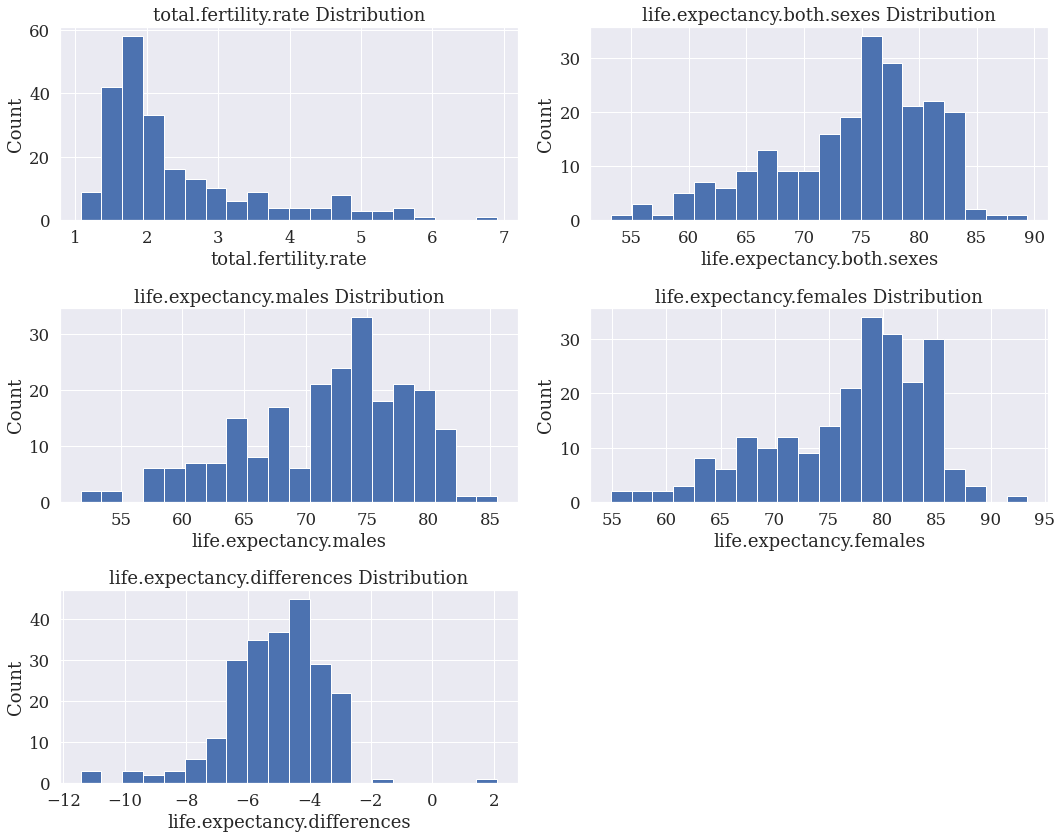

In [155]:
# Function to draw histograms for the Fertility and Life Expectancy values in a single figure.
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure()
    # Draw histogram for each variable
    for i, var_name in enumerate(variables):
        fig.set_figheight(12)
        ax = fig.add_subplot(n_rows,n_cols,i + 1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name +" Distribution")
        ax.set_xlabel(var_name)
        ax.set_ylabel('Count')
    fig.tight_layout()
    #Saving the figure to a pdf file
    fig.savefig('histograms.pdf',bbox_inches='tight')
    plt.show()
# Get data for each column
df_histograms = df_census_2021[columns_for_analysis]
# Call the draw histograms 
draw_histograms(df_histograms, df_histograms.columns, 3, 2)

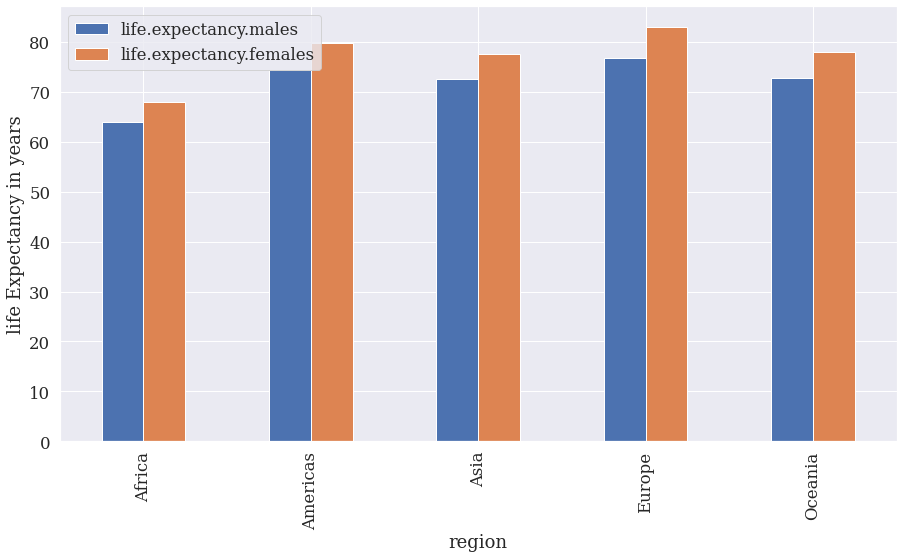

In [204]:
# Group the data by region to compare means of Life Expectancy at Birth for Males and Females
df_census_2021.groupby(['region'])[['life.expectancy.males','life.expectancy.females']].mean().plot(kind = 'bar')
plt.ylabel('life Expectancy in years')
plt.savefig('LE_Region.pdf',bbox_inches='tight')

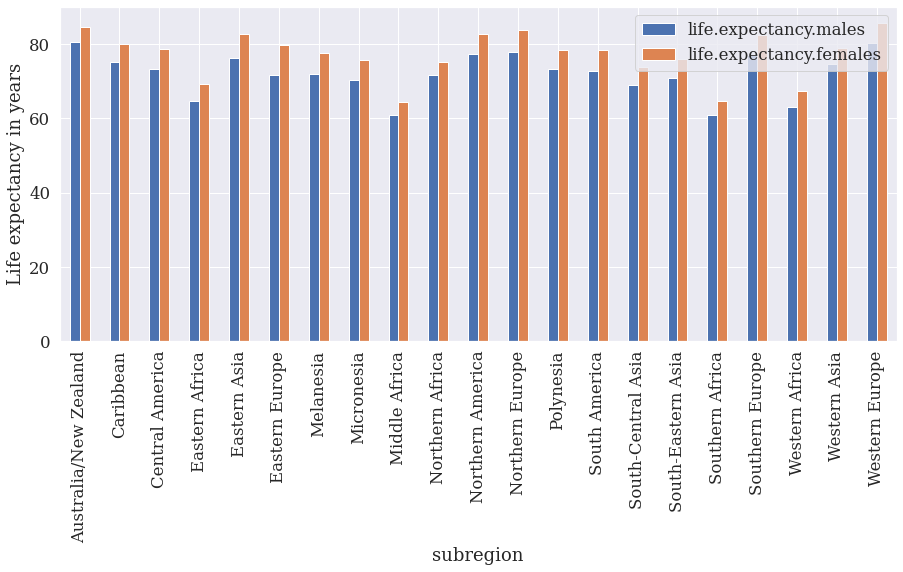

In [205]:
#Group the data by region to compare means of Life Expectancy at Birth for Males and Females
df_census_2021.groupby(['subregion'])[['life.expectancy.males','life.expectancy.females']].mean().plot(kind = 'bar')
plt.ylabel('Life expectancy in years')
plt.subplots_adjust(bottom=0.3)
plt.savefig('LE_Subregion.pdf',bbox_inches='tight')

# Bi-variate Analysis

In [158]:
variables = ['total.fertility.rate', 'life.expectancy.both.sexes', 'life.expectancy.males','life.expectancy.females']

In [159]:
# Generate a correlation matrix for each pair of the four numeric variables
corr_matrix1 = df_census_2021[variables].corr()
corr_matrix = corr_matrix1.round(3)
corr_matrix.to_latex('corr_matrix.tex')
corr_matrix

,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
total.fertility.rate,1.000,-0.800,-0.773,-0.816
life.expectancy.both.sexes,-0.800,1.000,0.993,0.993
life.expectancy.males,-0.773,0.993,1.000,0.973
life.expectancy.females,-0.816,0.993,0.973,1.000


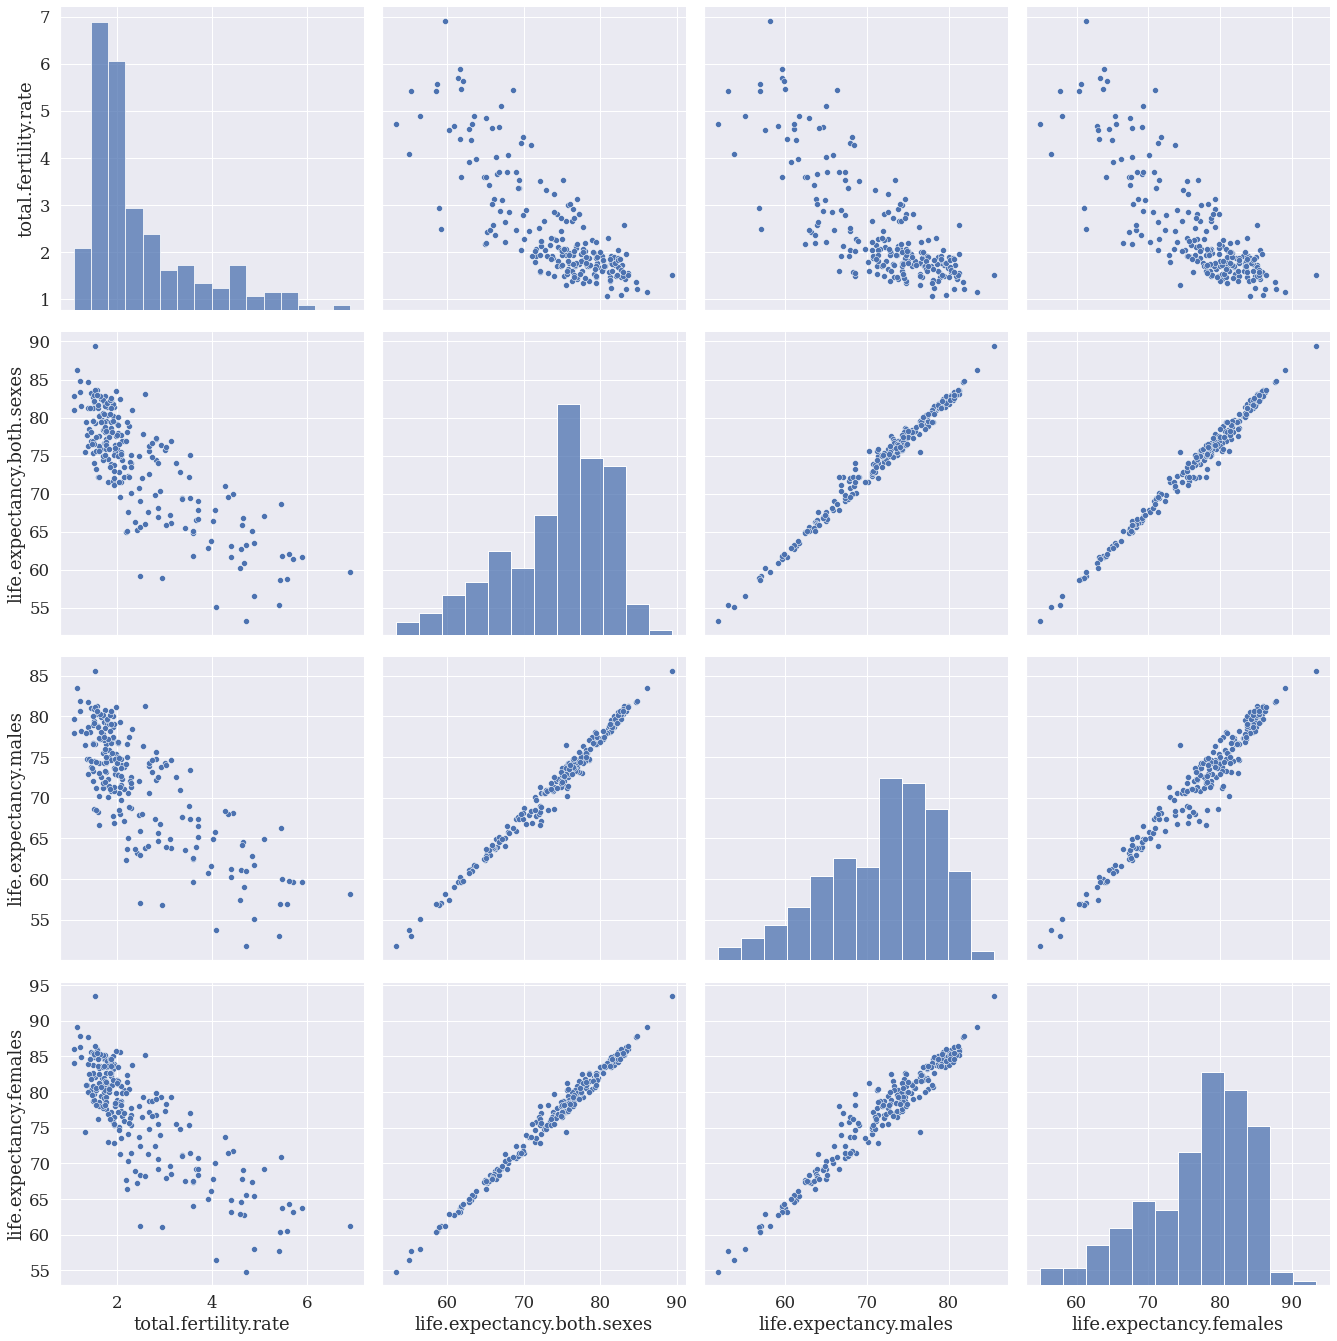

In [160]:
# Generate a matrix scatter plot for the numeric variables and save as a pdf image
pairplot = sns.pairplot(df_census_2021[variables])
pairplot.fig.set_size_inches(20,20)
plt.savefig('pairplot.pdf',bbox_inches='tight')

In [161]:
a = df_census_2021['life.expectancy.both.sexes'].corr(df_census_2021['life.expectancy.males'])
b = df_census_2021['life.expectancy.both.sexes'].corr(df_census_2021['life.expectancy.females'])
c = df_census_2021['life.expectancy.both.sexes'].corr(df_census_2021['total.fertility.rate'])
print(a.round(3),b.round(3),c.round(3))

0.993 0.993 -0.8


In [162]:
df = df_census_2021.drop(['country','genc','subregion','region','year'], axis=1)

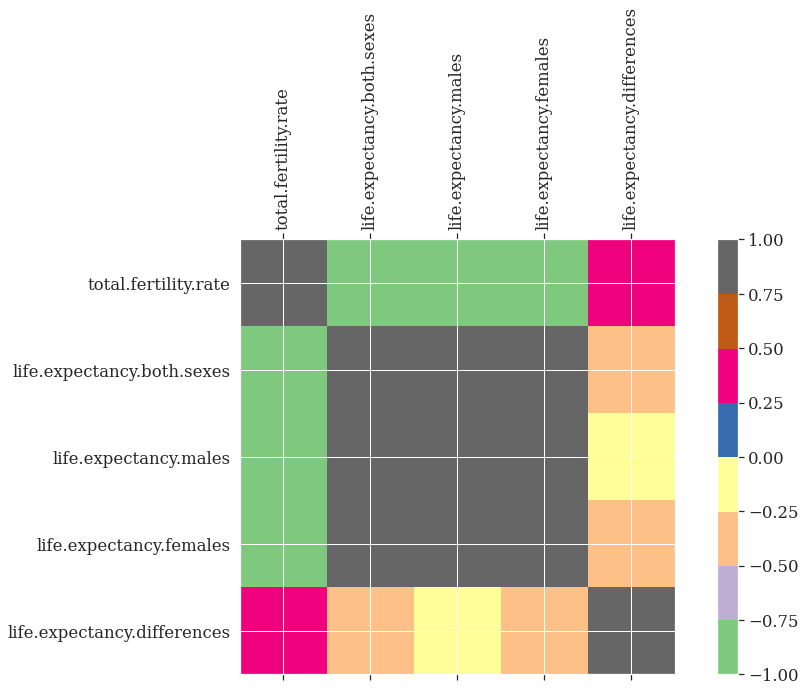

In [208]:
import numpy as np
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Accent', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns))
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.savefig('heatmap.pdf',bbox_inches='tight')
plt.show()

# Variability Analysis

In [164]:
# Calculate medians of each variable based on the Sub-regions
subregion_medians1 = df_census_2021.groupby(['subregion'])[variables].median()
subregion_medians=subregion_medians1.round(3)
subregion_medians.to_latex('subregion_medians.tex')
subregion_medians

,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
subregion,,,,
Australia/New Zealand,1.801,82.610,80.650,84.680
Caribbean,1.804,78.310,75.960,81.090
Central America,2.123,75.335,73.120,78.685
Eastern Africa,3.702,67.070,64.980,69.220
Eastern Asia,1.296,81.865,78.795,85.100
Eastern Europe,1.489,75.800,72.480,79.840
Melanesia,2.724,74.870,73.180,76.820
Micronesia,2.648,74.380,72.060,76.760
Middle Africa,4.406,61.710,60.270,63.810


In [165]:
# Calculate Inter-quartile regions of each variable based on the sub-regions
grouper = df_census_2021.groupby(['subregion'])[variables]
q1, q3 = grouper.quantile(0.25), grouper.quantile(0.75)
subregions_iqr = (q3 - q1).round(3)
subregions_iqr.to_latex('subregions_iqr.tex')
subregions_iqr

,total.fertility.rate,life.expectancy.both.sexes,life.expectancy.males,life.expectancy.females
subregion,,,,
Australia/New Zealand,0.066,0.280,0.080,0.490
Caribbean,0.286,4.180,2.870,4.900
Central America,0.315,2.755,3.243,3.313
Eastern Africa,1.266,3.840,4.100,3.360
Eastern Asia,0.497,8.575,8.345,8.745
Eastern Europe,0.090,4.402,5.705,3.277
Melanesia,0.506,2.450,2.460,2.590
Micronesia,0.490,4.460,5.075,4.420
Middle Africa,1.548,4.920,5.300,4.620


In [166]:
# The list of sub-regions and the corresponding colors to be displayed in the box plots
region_order = ['Australia/New Zealand', 'Eastern Europe', 'Western Europe', 'Northern Europe', 
                'Southern Europe','Eastern Asia', 'Western Asia', 'South-Central Asia', 
                'South-Eastern Asia', 'Micronesia', 'Polynesia', 'Melanesia', 'Caribbean', 'Central America', 
                'Northern America','South America','Eastern Africa', 'Western Africa', 'Middle Africa', 'Northern Africa',
                'Southern Africa']

subregion_colors = ['Pink', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Orange', 'Orange', 'Orange', 'Orange', 'violet', 
                    'violet','violet', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'yellow', 'yellow',
                    'yellow', 'yellow', 'yellow']

In [167]:
# Legend to use in box plots with different colors for different regions
legend_elements = [Line2D([0], [0], color='yellow', lw=4, label='Africa'), 
                   Line2D([0], [0], color='orange', lw=4, label='Asia'),
                   Line2D([0], [0], color='violet', lw=4, label='Oceania'), 
                   Line2D([0], [0], color='skyblue', lw=4, label='Americas'),
                   Line2D([0], [0], color='salmon', lw=4, label='Europe')]

In [209]:
# Code to generate box plots based on Sub-region
def draw_boxplots(x_axis_colname):
    ax = sns.boxplot(x = x_axis_colname, y = 'subregion', data = df_census_2021, 
                     order = region_order)
    # Setting colors for the boxes based on the region
    for i in range(len(subregion_colors)):
        mybox = ax.artists[i]
        mybox.set_facecolor(subregion_colors[i])
    # Add the legend defined above and display the plot
    ax.legend(handles=legend_elements)
    plt.tight_layout()
    plt.savefig(x_axis_colname + '.pdf',bbox_inches='tight')
    plt.show()

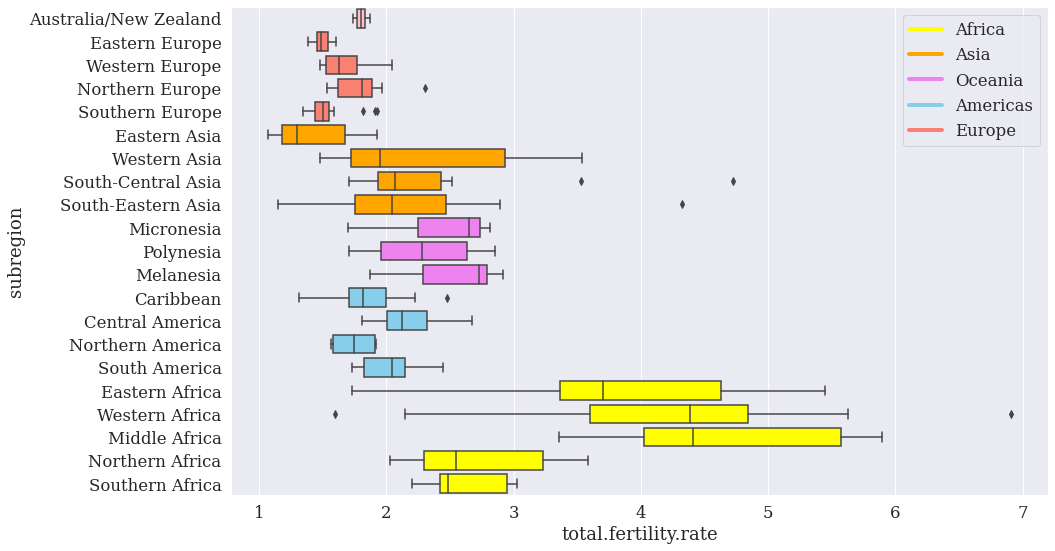

In [210]:
draw_boxplots('total.fertility.rate')

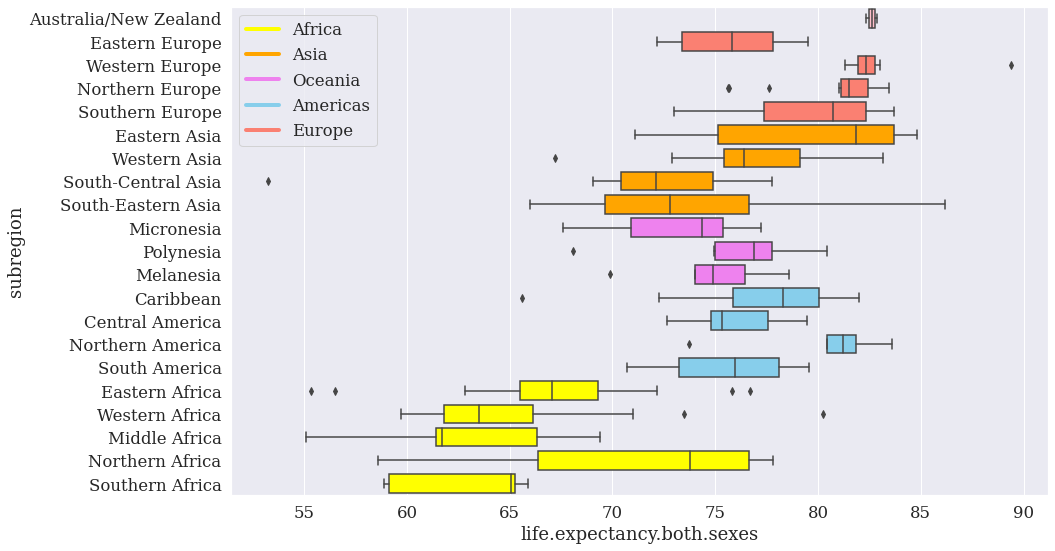

In [171]:
draw_boxplots('life.expectancy.both.sexes')

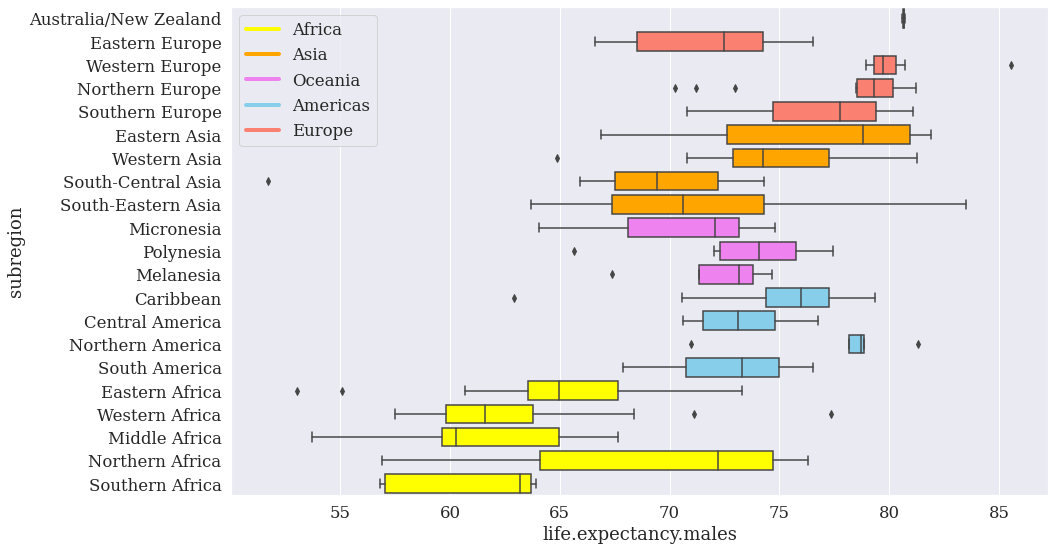

In [172]:
draw_boxplots('life.expectancy.males')

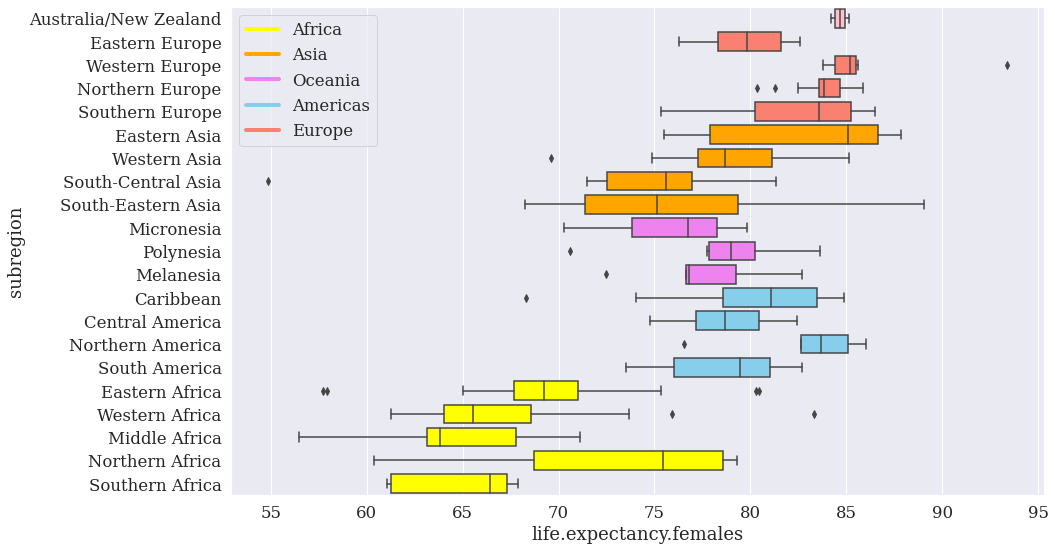

In [173]:
draw_boxplots('life.expectancy.females')

# Trend Analysis

In [174]:
# Use both data sets of years 2001 and 2021, Filter the data set for the year 2001
df_census_2001 = df_census[df_census['year'] == 2001]

In [175]:
# Check how many null values are present in the 2001 dataset
df_census_2001.isnull().sum()

country                       0
genc                          1
subregion                     0
region                        0
year                          0
total.fertility.rate          6
life.expectancy.both.sexes    6
life.expectancy.males         6
life.expectancy.females       6
dtype: int64

In [176]:
# Remove the rows both in 2001
df_census_2001 = df_census_2001.dropna(axis = 0, subset = variables)

In [177]:
# Remove the corresponding rows in 2021
df_census_2021 = df_census_2021[(df_census_2021['genc'] != 'LY') & (df_census_2021['genc'] != 'PR')  & (df_census_2021['genc'] != 'SS')  
                                & (df_census_2021['genc'] != 'SD')  & (df_census_2021['genc'] != 'SY') & (df_census_2021['genc'] != 'US')]

In [206]:
# Function to draw scatter plots of the variables for years 2001 and 2021
def draw_scatterplots(variables):
    fig = plt.figure()
    # The code below is used to place the plots in a grid-like figure
    for i, var_name in enumerate(variables):
        fig.set_figheight(12)
        ax = fig.add_subplot(2, 2, i + 1)
        x = df_census_2001[var_name]
        y = df_census_2021[var_name]
        plt.scatter(x, y)
        plt.plot(x, x, color = 'red', label='x=y')
        plt.xlabel(var_name + ' in 2001')
        plt.ylabel(var_name + ' in 2021')
    fig.tight_layout()
    plt.savefig('scatterplots.pdf', format="pdf",bbox_inches='tight')
    plt.show()

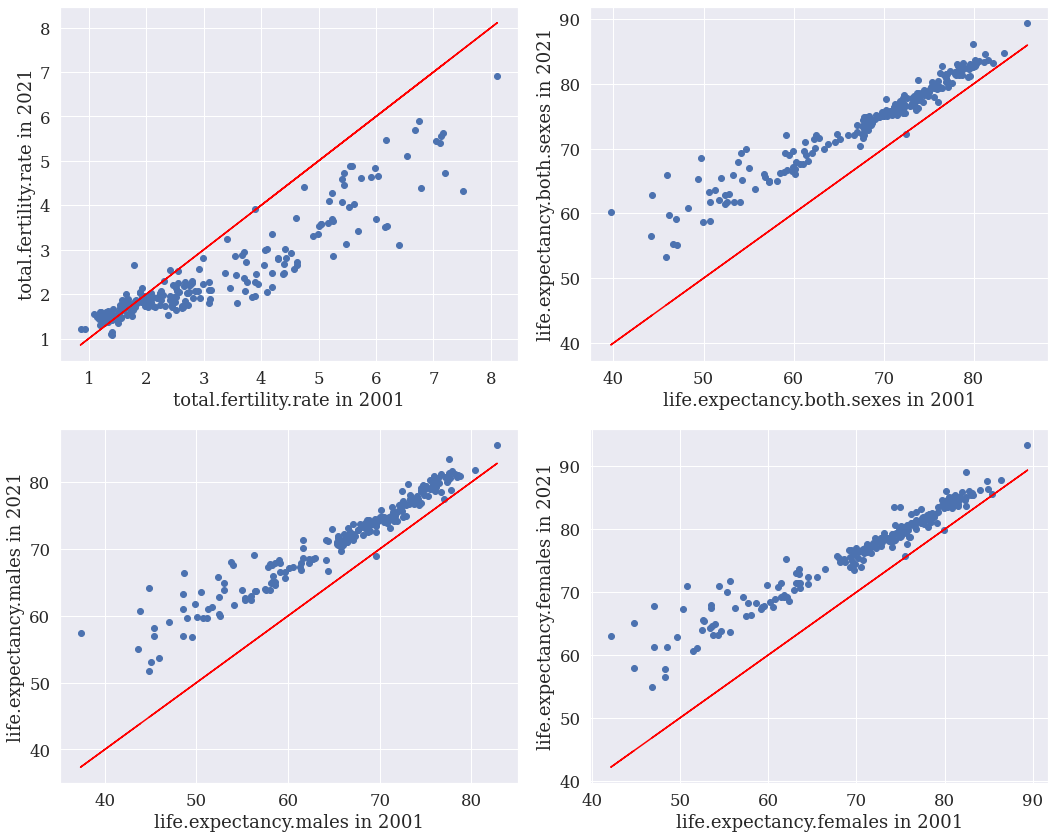

In [207]:
draw_scatterplots(variables)

In [179]:
df_census_2021.groupby(['subregion'])['total.fertility.rate'].mean().round(3)

subregion
Australia/New Zealand    1.801
Caribbean                1.842
Central America          2.189
Eastern Africa           3.774
Eastern Asia             1.426
Eastern Europe           1.492
Melanesia                2.517
Micronesia               2.446
Middle Africa            4.594
Northern Africa          2.738
Northern America         1.744
Northern Europe          1.796
Polynesia                2.290
South America            2.014
South-Central Asia       2.350
South-Eastern Asia       2.227
Southern Africa          2.616
Southern Europe          1.549
Western Africa           4.243
Western Asia             2.284
Western Europe           1.665
Name: total.fertility.rate, dtype: float64

In [180]:
df_census_2021.groupby(['subregion'])['total.fertility.rate'].mean().var()

0.7496218821188314

In [181]:
df_census_2021.groupby(['subregion'])['life.expectancy.both.sexes'].mean().var()

35.64655203844851

In [182]:
df_census_2021.groupby(['subregion'])['life.expectancy.males'].mean().var()

33.1581987143266

In [183]:
df_census_2021.groupby(['subregion'])['life.expectancy.females'].mean().var()

39.07822563800496